# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Create DataFrames

In [9]:
rick = pd.read_csv('data/rick_diamonds.csv')
rick.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [10]:
# Create Rick's auxiliar DataFrame to add categorical columns transformation and be able to predict Rick's diamonds
rick_aux = rick

In [11]:
rick_aux['n_cut'] = rick_aux['cut'].map(cut_dict)
rick_aux['n_color'] = rick_aux['color'].map(color_dict)
rick_aux['n_clarity'] = rick_aux['clarity'].map(clarity_dict)

NameError: name 'cut_dict' is not defined

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamonds.shape

# Cleaning the Data

### Transform Categorical into Numeric

In [12]:
diamonds['clarity'].value_counts()
diamonds['color'].unique()
diamonds['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [13]:
clarity_dict = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
color_dict = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
cut_dict = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}

In [14]:
diamonds['n_cut'] = diamonds['cut'].map(cut_dict)
diamonds['n_color'] = diamonds['color'].map(color_dict)
diamonds['n_clarity'] = diamonds['clarity'].map(clarity_dict)

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,5,2
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,5,4
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,2,0,5


In [16]:
diamonds.describe()

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,2.906416,3.407254,3.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000,6.000000,7.000000


In [17]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      48940 non-null  float64
 1   cut        48940 non-null  object 
 2   color      48940 non-null  object 
 3   clarity    48940 non-null  object 
 4   depth      48940 non-null  float64
 5   table      48940 non-null  float64
 6   price      48940 non-null  int64  
 7   x          48940 non-null  float64
 8   y          48940 non-null  float64
 9   z          48940 non-null  float64
 10  n_cut      48940 non-null  int64  
 11  n_color    48940 non-null  int64  
 12  n_clarity  48940 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.9+ MB


## Check variables correlation

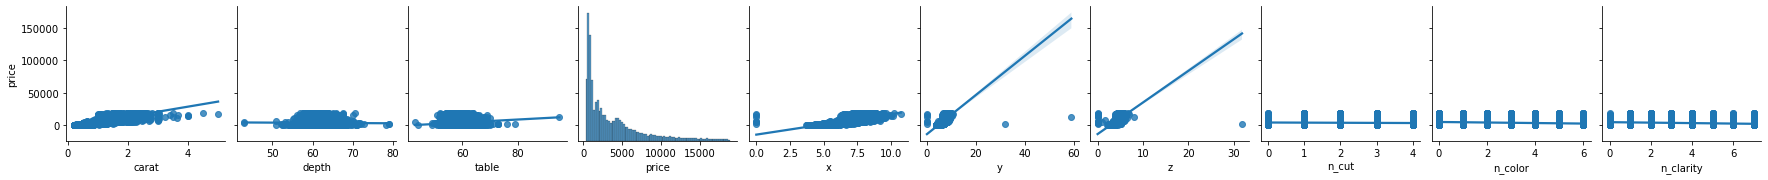

In [18]:
sns.pairplot(data=diamonds, y_vars='price', kind='reg')

In [19]:
diamonds.corr()['price']

carat        0.922186
depth       -0.012037
table        0.127832
price        1.000000
x            0.885019
y            0.864059
z            0.860247
n_cut       -0.055150
n_color     -0.173129
n_clarity   -0.148668
Name: price, dtype: float64

# Create model

## Model #1

### Model with all variables

In [ ]:
#Instanciante LinearRegression object
model = LinearRegression()

In [ ]:
#Define X and Y
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

In [ ]:
#Train the model
model.fit(x, y)

In [ ]:
# Create predict
y_pred = model.predict(x)

In [ ]:
#Check RMSE
np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
#Check R2 Score
r2_score(y, y_pred)
model.score(x, y)

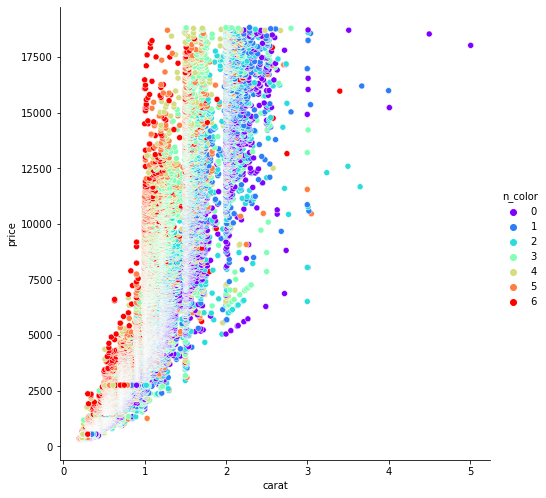

In [22]:
sns.pairplot(diamonds,y_vars='price', x_vars ='carat', hue = 'n_color',palette = 'rainbow',height = 7)

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlim'

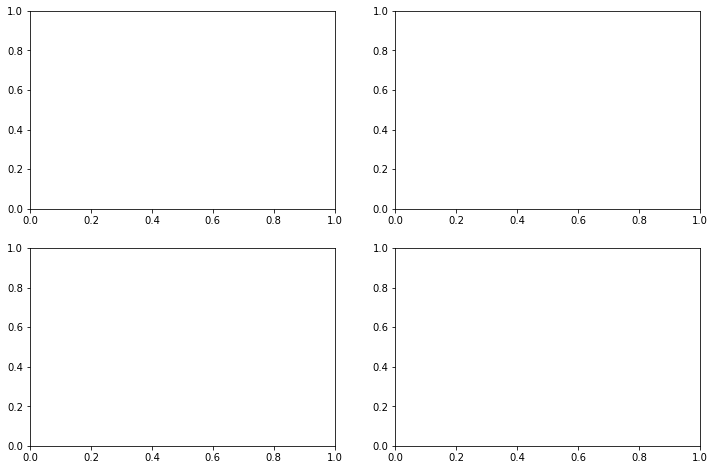

In [259]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8));
axes.set_xlim(0,5)

sns.scatterplot(data=diamonds[clarity_bad], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[0,0]);
sns.scatterplot(data=diamonds[clarity_med], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[0,1]);
sns.scatterplot(data=diamonds[clarity_good], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[1,0]);
sns.scatterplot(data=diamonds[clarity_nice], x='carat', y='price', hue='n_clarity', palette='rainbow', ax=axes[1,1]);

## Model #1 Result - RMSE: 1210,8732

## Model #2
## Idea - Create different coefficients for Clarity
### Separete Clarity in 4 bins

In [ ]:
# Other variables column list
column_list = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_color']

In [ ]:
# Create clarity mask (4 bins)
clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define X and Y with clarity mask
x_clarity_bad = diamonds.loc[clarity_bad, column_list]
x_clarity_med = diamonds.loc[clarity_med, column_list]
x_clarity_good = diamonds.loc[clarity_good, column_list]
x_clarity_nice = diamonds.loc[clarity_nice, column_list]

y_clarity_bad = diamonds.loc[clarity_bad, 'price']
y_clarity_med = diamonds.loc[clarity_med, 'price']
y_clarity_good = diamonds.loc[clarity_good, 'price']
y_clarity_nice = diamonds.loc[clarity_nice, 'price']

In [ ]:
# Instanciate one model per bin
model_clarity_bad = LinearRegression()
model_clarity_med = LinearRegression()
model_clarity_good = LinearRegression()
model_clarity_nice = LinearRegression()

In [ ]:
# Train models
model_clarity_bad.fit(x_clarity_bad, y_clarity_bad)
model_clarity_med.fit(x_clarity_med, y_clarity_med)
model_clarity_good.fit(x_clarity_good, y_clarity_good)
model_clarity_nice.fit(x_clarity_nice, y_clarity_nice)

In [ ]:
# Check individual score
print(model_clarity_bad.score(x_clarity_bad, y_clarity_bad))
print(model_clarity_med.score(x_clarity_med, y_clarity_med))
print(model_clarity_good.score(x_clarity_good, y_clarity_good))
print(model_clarity_nice.score(x_clarity_nice, y_clarity_nice))

In [ ]:
# Make predictions
y_pred_clarity_bad = model_clarity_bad.predict(x_clarity_bad)
y_pred_clarity_med = model_clarity_med.predict(x_clarity_med)
y_pred_clarity_good = model_clarity_good.predict(x_clarity_good)
y_pred_clarity_nice = model_clarity_nice.predict(x_clarity_nice)

In [ ]:
# Check individuals RMSE's
print(np.sqrt(mean_squared_error(y_clarity_bad, y_pred_clarity_bad)))
print(np.sqrt(mean_squared_error(y_clarity_med, y_pred_clarity_med)))
print(np.sqrt(mean_squared_error(y_clarity_good, y_pred_clarity_good)))
print(np.sqrt(mean_squared_error(y_clarity_nice, y_pred_clarity_nice)))

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model(row,models):
    if row['n_clarity'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_clarity'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [ ]:
predict = x.apply(verify_model, models = {'bad':model_clarity_bad,
                                            'med':model_clarity_med,
                                            'good':model_clarity_good,
                                            'nice':model_clarity_nice}, axis=1)

In [ ]:
# Check new R2 Score
r2_score(y, predict)

In [ ]:
# Check new RMSE
np.sqrt(mean_squared_error(y, predict))

## Model #2 Result - RMSE: 1013,2930

## Model #3
## Idea - Create different coefficients for color
### Separete Color in 4 bins

In [ ]:
# Other variables column list
column_list_1 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut', 'n_clarity']

In [ ]:
# Create color mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

In [ ]:
# Define X and Y with color mask
x_color_bad = diamonds.loc[color_bad, column_list_1]
x_color_med = diamonds.loc[color_med, column_list_1]
x_color_good = diamonds.loc[color_good, column_list_1]
x_color_nice = diamonds.loc[color_nice, column_list_1]

y_color_bad = diamonds.loc[color_bad, 'price']
y_color_med = diamonds.loc[color_med, 'price']
y_color_good = diamonds.loc[color_good, 'price']
y_color_nice = diamonds.loc[color_nice, 'price']

In [ ]:
# Instanciate one model per bin
model_color_bad = LinearRegression()
model_color_med = LinearRegression()
model_color_good = LinearRegression()
model_color_nice = LinearRegression()

In [ ]:
# Train models
model_color_bad.fit(x_color_bad, y_color_bad)
model_color_med.fit(x_color_med, y_color_med)
model_color_good.fit(x_color_good, y_color_good)
model_color_nice.fit(x_color_nice, y_color_nice)

In [ ]:
# Check individual scores
print(model_color_bad.score(x_color_bad, y_color_bad))
print(model_color_med.score(x_color_med, y_color_med))
print(model_color_good.score(x_color_good, y_color_good))
print(model_color_nice.score(x_color_nice, y_color_nice))

In [ ]:
# Make predictions
y_pred_color_bad = model_color_bad.predict(x_color_bad)
y_pred_color_med = model_color_med.predict(x_color_med)
y_pred_color_good = model_color_good.predict(x_color_good)
y_pred_color_nice = model_color_nice.predict(x_color_nice)

In [ ]:
# Check individual RMSE's
print(np.sqrt(mean_squared_error(y_color_bad, y_pred_color_bad)))
print(np.sqrt(mean_squared_error(y_color_med, y_pred_color_med)))
print(np.sqrt(mean_squared_error(y_color_good, y_pred_color_good)))
print(np.sqrt(mean_squared_error(y_color_nice, y_pred_color_nice)))

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_2(row,models):
    if row['n_color'] == 0:
        return models['bad'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [1,2] :
        return models['med'].predict(pd.DataFrame(row[column_list]).T)[0]
    elif row['n_color'] in [3,4]:
        return models['good'].predict(pd.DataFrame(row[column_list]).T)[0]
    else:
        return models['nice'].predict(pd.DataFrame(row[column_list]).T)[0]

In [ ]:

predict_2 = x.apply(verify_model_2, models = {'bad':model_color_bad,
                                            'med':model_color_med,
                                            'good':model_color_good,
                                            'nice':model_color_nice}, axis=1)

In [ ]:
#Check new R2 Score
r2_score(y, predict_2)

In [ ]:
#Chekc new RMSE
np.sqrt(mean_squared_error(y, predict_2))

## Model #3 Result - RMSE: 1137,4981

## Model #4
## Idea - mix model #2 and #3

In [ ]:
column_list_2 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [ ]:
# Create color and clarity mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good, 'nice':color_nice}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good, 'nice':clarity_nice}


In [ ]:
color_mask['bad']

In [ ]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [ ]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [ ]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(16):
    model_color_clarity_dict[i] = LinearRegression()

In [ ]:
# Train models
for i in range(16):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

In [ ]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


In [ ]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [ ]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [ ]:
predict_3 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
r2_score(y, predict_3)

In [ ]:
np.sqrt(mean_squared_error(y, predict_3))

In [ ]:
x_rick = rick_aux.drop(['color', 'cut', 'clarity'], axis=1)

In [ ]:
predict_rick = x_rick.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
rick['price_predicted'] = predict_rick

In [ ]:
rick.to_csv('data/rick_diamonds_price_model4.csv')

## Model #4 Result
## RMSE: 831,30
## Rick's RMSE: 845,09

## Model #5
### Use model RandomForestRegressor with 16 previous models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()

In [ ]:
column_list_2 = ['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [ ]:
# Create color and clarity mask
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good, 'nice':color_nice}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good, 'nice':clarity_nice}


In [ ]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [ ]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [ ]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(16):
    model_color_clarity_dict[i] = RandomForestRegressor()

In [ ]:
# Train models
for i in range(16):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

In [ ]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


In [ ]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [ ]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [ ]:
# Predict training diamonds
predict_4 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
r2_score(y, predict_4)

In [ ]:
np.sqrt(mean_squared_error(y, predict_4))

In [ ]:
# Predict Rick's diamonds
predict_rick = x_rick.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
# Put the pices in Rick's DataFrame
rick['price_predicted'] = predict_rick

In [ ]:
# Save the DataFrame
rick.to_csv('data/rick_diamonds_price_model5.csv')

## Model #5 Result
## RMSE: 258,12
## Rick's RMSE: 705,57

## Model #6
### Use model RandomForestRegressor alone

In [ ]:
#Instanciante LinearRegression object
model_6 = RandomForestRegressor()

In [ ]:
#Define X and Y
x = diamonds.drop(['price', 'color', 'cut', 'clarity'], axis=1)
y = diamonds['price']

In [ ]:
#Train the model
model_6.fit(x, y)

In [ ]:
# Create predict
y_pred_6 = model_6.predict(x)

In [ ]:
#Check RMSE
np.sqrt(mean_squared_error(y, y_pred_6))

In [ ]:
#Check R2 Score
model_6.score(x, y)

In [ ]:
# Predict Rick's diamonds
predict_rick_6 = model_6.predict(x_rick)

In [ ]:
# Put the pices in Rick's DataFrame
rick['price_predicted'] = predict_rick_6

In [ ]:
# Save the DataFrame
rick.to_csv('data/rick_diamonds_price_model6.csv')

## Model #6 Result
## RMSE: 200,38
## Rick's RMSE: 539,98

## Model #7
### Logarithmic model

In [ ]:
## adicionar 1 ao n_category

In [294]:
df_7_aux = diamonds.drop(['color','clarity','cut'], axis=1)
df_7_aux[['n_cut','n_color','n_clarity']] = df_7_aux[['n_cut','n_color','n_clarity']] + 1

In [295]:
df_7 = np.log(df_7_aux)

c:\Users\Pedro\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [296]:
df_7

,carat,depth,table,price,x,y,z,n_cut,n_color,n_clarity
0,-1.560648,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248,1.386294,1.791759,1.098612
1,-1.469676,4.041295,4.174387,5.789960,1.398717,1.403643,0.837248,0.693147,1.791759,1.609438
2,-1.237874,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984,1.386294,0.693147,1.386294
3,-1.171183,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601,0.693147,0.000000,0.693147
4,-1.427116,4.139955,4.043051,5.817111,1.371181,1.376244,0.908259,1.098612,0.000000,1.791759
...,...,...,...,...,...,...,...,...,...,...
48935,-0.328504,4.138361,4.077537,7.921898,1.738710,1.745716,1.275363,1.386294,1.945910,1.098612
48936,-0.328504,4.107590,4.043051,7.921898,1.749200,1.750937,1.252763,1.609438,1.945910,1.098612
48937,-0.328504,4.144721,4.007333,7.921898,1.738710,1.749200,1.283708,0.693147,1.945910,1.098612
48938,-0.356675,4.139955,4.094345,7.921898,1.733424,1.736951,1.269761,1.098612,1.945910,1.098612


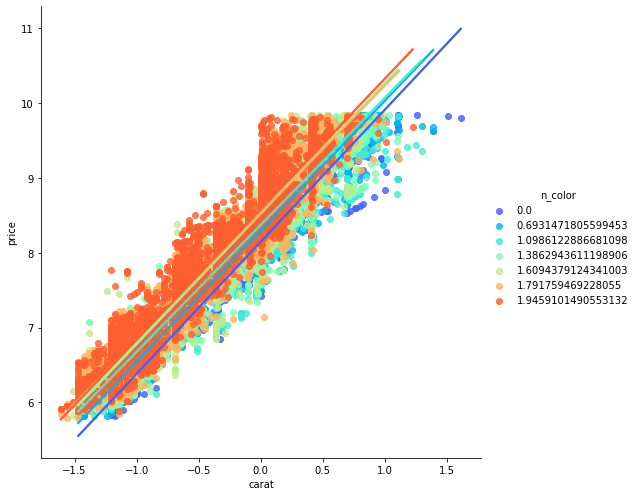

In [310]:
sns.lmplot(data = df_7,y='price', x ='carat', hue='n_color',palette='rainbow',height = 7)

In [298]:
x_7 = df_7[['carat', 'depth', 'table','x', 'y', 'z', 'n_cut']]
y_7 = df_7['price']

In [311]:
# Create color and clarity mask
color_bad = diamonds['n_color'].between(0,1.1)
color_med = diamonds['n_color'].between(1.11,1.62)
color_good = diamonds['n_color'].between(1.63,3)
color_mask = {'bad':color_bad,'med':color_med, 'good':color_good}

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(0.5,1.7)
clarity_good = diamonds['n_clarity'].between(1.71,3)
clarity_mask = {'bad':clarity_bad,'med':clarity_med, 'good':clarity_good}

In [312]:
column_list_2

['carat', 'depth', 'table', 'x', 'y', 'z', 'n_cut']

In [313]:
# Define X with color and clarity masks
i = 0
x_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            x_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), column_list_2]
            i += 1

In [314]:
# Define Y with color and clarity masks
i = 0
y_color_clarity_dict = {}

for value in color_mask.values():
        for value_1 in clarity_mask.values():
            y_color_clarity_dict[i] = diamonds.loc[(value) & (value_1), 'price']
            i += 1

In [315]:
# Instanciate one model per bin
model_color_clarity_dict = {}
for i in range(9):
    model_color_clarity_dict[i] = LinearRegression()

In [316]:
# Train models
for i in range(9):
    model_color_clarity_dict[i].fit(x_color_clarity_dict[i], y_color_clarity_dict[i])

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [ ]:
# Check individual scores
for i in range(len(model_color_clarity_dict)):
    print(model_color_clarity_dict[i].score(x_color_clarity_dict[i], y_color_clarity_dict[i]))


In [ ]:
# Make predictions
y_pred_color_clarity_dict = {}
for i in range(len(model_color_clarity_dict)):
    y_pred_color_clarity_dict[i] = model_color_clarity_dict[i].predict(x_color_clarity_dict[i])

In [ ]:
# Check individual RMSE's
for i in range(len(model_color_clarity_dict)):
    print(np.sqrt(mean_squared_error(y_color_clarity_dict[i], y_pred_color_clarity_dict[i])))

In [ ]:
color_bad = diamonds['n_color'] == 0
color_med = diamonds['n_color'].between(1,2)
color_good = diamonds['n_color'].between(3,4)
color_nice = diamonds['n_color'].between(5,6)

clarity_bad = diamonds['n_clarity'] == 0
clarity_med = diamonds['n_clarity'].between(1,2)
clarity_good = diamonds['n_clarity'].between(3,4)
clarity_nice = diamonds['n_clarity'].between(5,7)

In [ ]:
# Define funtion to verify which category each line fits into
def verify_model_3(row,models):
    if row['n_color'] == 0 and row['n_clarity'] == 0:
        return models[0].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [1,2]:
        return models[1].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [3,4]:
        return models[2].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] == 0 and row['n_clarity'] in [5,6,7]:
        return models[3].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] == 0:
        return models[4].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [1,2]:
        return models[5].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [3,4]:
        return models[6].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [1,2] and row['n_clarity'] in [5,6,7]:
        return models[7].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] == 0:
        return models[8].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [1,2]:
        return models[9].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [3,4]:
        return models[10].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [3,4] and row['n_clarity'] in [5,6,7]:
        return models[11].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] == 0:
        return models[12].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [1,2]:
        return models[13].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [3,4]:
        return models[14].predict(pd.DataFrame(row[column_list_2]).T)[0]
    elif row['n_color'] in [5,6] and row['n_clarity'] in [5,6,7]:
        return models[15].predict(pd.DataFrame(row[column_list_2]).T)[0]

In [ ]:
# Predict training diamonds
predict_4 = x.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
r2_score(y, predict_4)

In [ ]:
np.sqrt(mean_squared_error(y, predict_4))

In [ ]:
# Predict Rick's diamonds
predict_rick = x_rick.apply(verify_model_3, models = {0:model_color_clarity_dict[0],
                                                1:model_color_clarity_dict[1],
                                                2:model_color_clarity_dict[2],
                                                3:model_color_clarity_dict[3],
                                                4:model_color_clarity_dict[4],
                                                5:model_color_clarity_dict[5],
                                                6:model_color_clarity_dict[6],
                                                7:model_color_clarity_dict[7],
                                                8:model_color_clarity_dict[8],
                                                9:model_color_clarity_dict[9],
                                                10:model_color_clarity_dict[10],
                                                11:model_color_clarity_dict[11],
                                                12:model_color_clarity_dict[12],
                                                13:model_color_clarity_dict[13],
                                                14:model_color_clarity_dict[14],
                                                15:model_color_clarity_dict[15]
                                            }, axis=1)

In [ ]:
# Put the pices in Rick's DataFrame
rick['price_predicted'] = predict_rick

In [ ]:
# Save the DataFrame
rick.to_csv('data/rick_diamonds_price_model5.csv')